<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# eliminar espacios
string = '    lustroso  busbuja   '
# imprimir con espacios
print(string)
#imprimir sin espacios
print(string.strip())
# OJO, solo espacios que estan al princio y al final del texto

# eliminar una palabra
print(string.strip(' lustroso'))


    lustroso  busbuja   
lustroso  busbuja
busbuja


In [ ]:
mapeo = {'Microfost':'DesktopOS','MacOS':'DesktopOS',
         'Linux':'DesktopOS','IOS':'MobileOS','Android':'MobileOs'}

import numpy as np
equipos = np.array([])
equipos['sistemas_operativos'] = equipos['sistemas_operativos'].replace(mapeo)


IndexError: ignored

In [ ]:
# apply MLPClassifier
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import mglearn
from sklearn.neural_network import MLPClassifier

In [ ]:
cancer = load_breast_cancer()

print('Cancer data per-feature maxima:\n{}'.format(cancer.data.max(axis=0))) #columns

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
# entrenamps multilayer perceptors, with features default

mlp = MLPClassifier().fit(X_train, y_train)

print('Accuracy MLPC-train: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy MLP-test: {:.3f}'.format(mlp.score(X_test, y_test)))


Accuracy MLPC-train: 0.887
Accuracy MLP-test: 0.867


In [ ]:
# compute the mean value pero feature on the training set
mean_on_train = X_train.mean(axis=0)

# compute the  standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)


# subtrack the mean, and scale by inverse standart deviation
# ofterward, mean=0 ^ std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# used the same transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)

print('Accuracy training set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy training set: 0.991
Accuracy test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp = MLPClassifier(max_iter=34, random_state=0).fit(X_train_scaled, y_train)

print('Accuracy training set {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy test set {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy training set 0.979
Accuracy test set 0.972


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp = MLPClassifier(max_iter=34, alpha=1, random_state=0).fit(X_train_scaled, y_train)

print('Accuracy trainig set: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy trainig set: 0.979
Accuracy test set: 0.972


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'input feature')

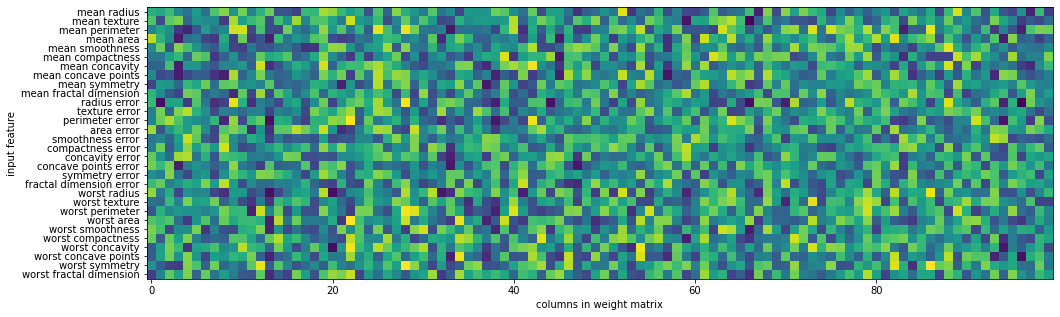

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('columns in weight matrix')
plt.ylabel('input feature')
